<a href="https://colab.research.google.com/github/hiu04/Data-Science/blob/main/A2_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Statistical Testing and A/B Testing

*Author: Xiaoyu Ma*


*Date: Jun 13 2023*

**Scenario**

You work for a mobile application as a Product Analyst, and you're testing changes to an existing feature. You would like to release changes to a key feature and have prepared 2 possible variants.  You've been running an experiment for 2 weeks, and now have some data with the experiment results. Specifically, you have the Click-Through-Rate (CTR) and Average Time Spent, in minutes, for each feature. The CTR means that the user is moving through different parts of the feature. A CTR of 1 would indicate the user has fully clicked on everything in a feature, while a CTR of 0 means they have not clicked anything. 


## Loading data and packages

In [39]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [40]:
# import data
df = pd.read_csv("/content/experiment_dataset.csv")
df

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...,...
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423


In [41]:
# set first column as index and update
df = df.set_index("Unnamed: 0")

In [42]:
# rename the Time Spent column and update
df = df.rename(columns={'Time Spent': 'Time_Spent'})

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1000 non-null   int64  
 1   Location    1000 non-null   object 
 2   Device      1000 non-null   object 
 3   Variant     1000 non-null   object 
 4   Time_Spent  1000 non-null   float64
 5   CTR         1000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 54.7+ KB


In [44]:
df['Variant'].value_counts()

Control      340
Variant B    330
Variant A    330
Name: Variant, dtype: int64

## 1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

### Variant 

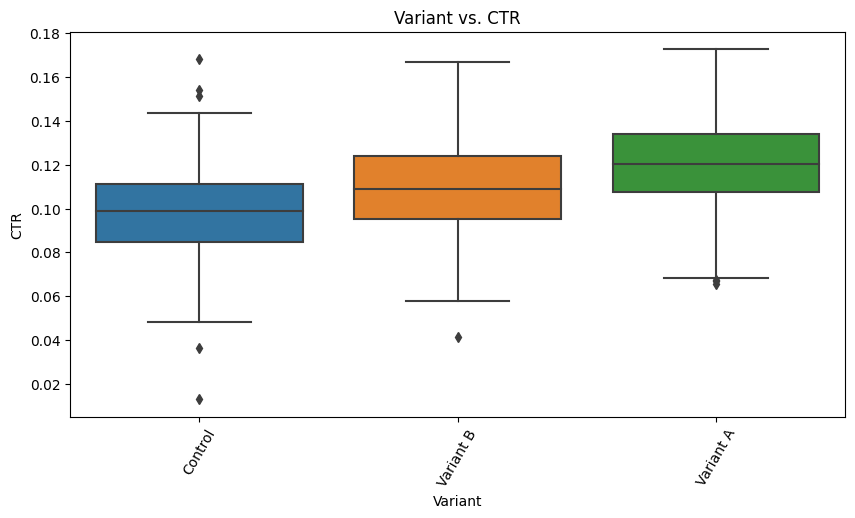

In [45]:
# Variant vs. CTR
plt.figure(figsize=(10,5))
sns.boxplot(x='Variant', y='CTR', data=df)
plt.tick_params(axis='x', rotation=60)
plt.title('Variant vs. CTR')
plt.show()

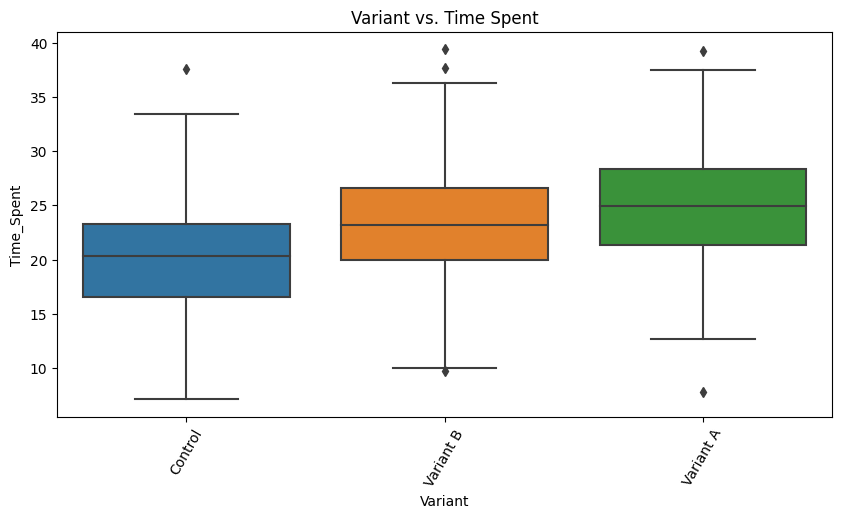

In [46]:
# Variant vs. Time Spent
plt.figure(figsize=(10,5))
sns.boxplot(x='Variant', y='Time_Spent', data=df)
plt.tick_params(axis='x', rotation=60)
plt.title('Variant vs. Time Spent')
plt.show()

The difference between control group and variant groups are apparent. But the association of each variant groups on CTR or time spent are similar. For instance, the median of time spent and CTR from Variant A group is the largest while the median of Control group is the lowest for both CTR and time spent. This indicates that "Variant A" feature results in  CTR or Time Spent lift, followed by "Variant B".

In [47]:
# linear regression Variant VS CTR
mod1 = ols('CTR ~ Variant', data=df).fit()
print(mod1.params)

Intercept               0.098554
Variant[T.Variant A]    0.021715
Variant[T.Variant B]    0.010379
dtype: float64


$$\text{CTR}=0.098554 + 0.021715 * Variant A + 0.010379*Variant B$$

The average CTR for baseline control group is 0.099. The CTR increases 2% for variant A feature, compared to control group. Similarly, the CTR increase 1% for variant B feature. Therefore, the regression line also shows that variant A results in CTR lifts.

In [48]:
# linear regression Variant VS CTR
mod2 = ols('Time_Spent ~ Variant', data=df).fit()
print(mod2.params)

Intercept               20.070781
Variant[T.Variant A]     4.734766
Variant[T.Variant B]     3.273002
dtype: float64


$$\text{Time_Spent}=20.070781 + 4.734766 * Variant A +  3.273002*Variant B$$

The average time spent for baseline control group is 20 minutes. For variant A feature, users would like to spend about 5 more minutes, compared to control group. Regarding variant B, users stay additional 3 minutes, compare to control group. Therefore, the regression line also shows that variant A results in average time spent lifts.

### Other variables

* Age

<ipython-input-95-b874e109f562>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


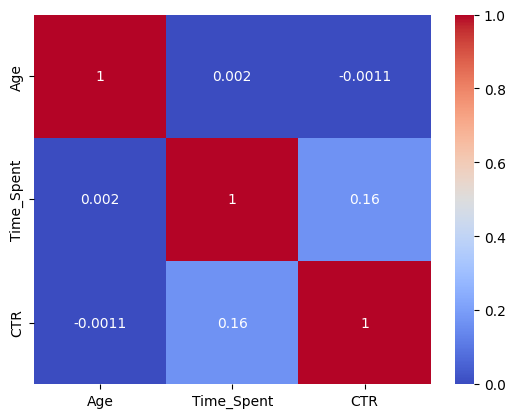

In [95]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

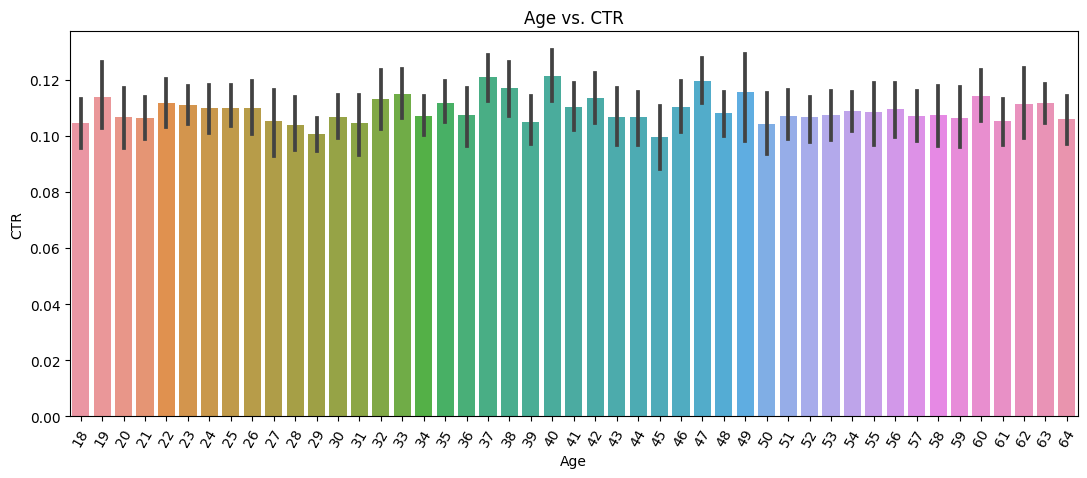

In [96]:
# Age vs. CTR
plt.figure(figsize=(13,5))
sns.barplot(x='Age', y='CTR', data=df)
plt.xlabel('Age')
plt.tick_params(axis='x', rotation=60)
plt.ylabel('CTR')
plt.title('Age vs. CTR')
plt.show()

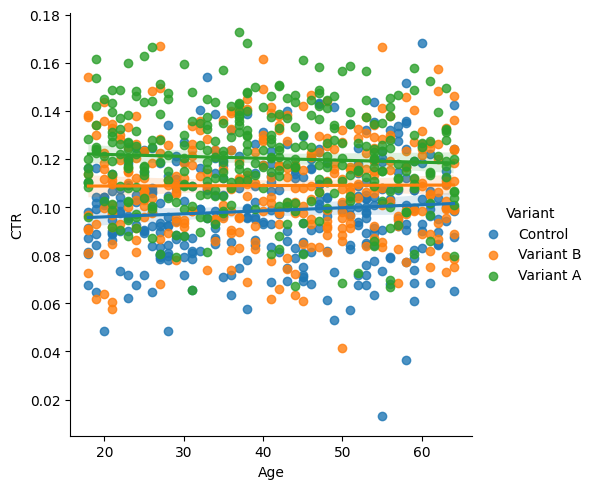

In [94]:
sns.lmplot(data = df, x='Age', y='CTR', hue = 'Variant')

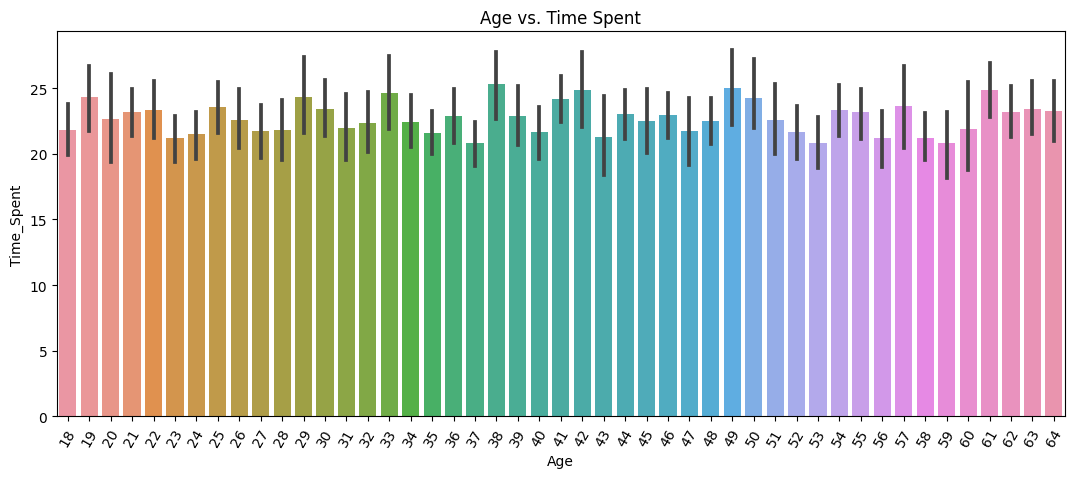

In [51]:
# Age vs. Time Spent
plt.figure(figsize=(13,5))
sns.barplot(x='Age', y='Time_Spent', data=df)
plt.tick_params(axis='x', rotation=60)
plt.title('Age vs. Time Spent')
plt.show()

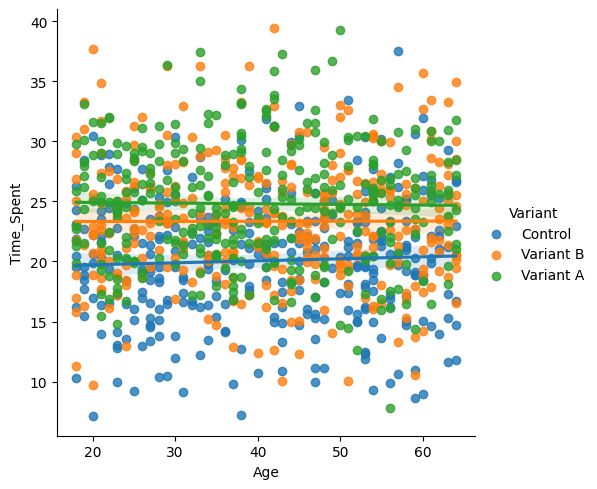

In [97]:
sns.lmplot(data = df, x='Age', y='Time_Spent', hue = 'Variant')

Notice that the plots showing an uniform distribution, meaning that the associations between age and CTR and time spent respectively are not significant. This results also are demostrated from the correlation matrix plot. But from the matrix, it shows more information that as the age increase the CTR would decrease while the age has opposite impact on time spent.

* Location

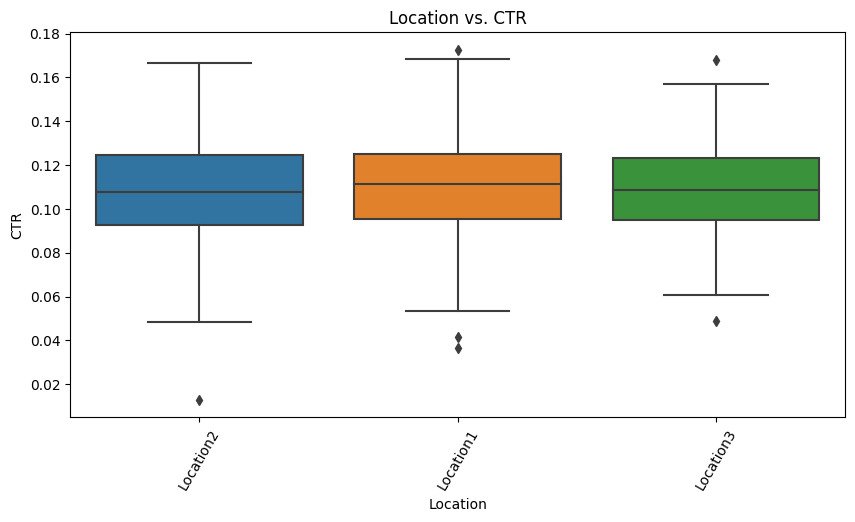

In [52]:
# Location vs. CTR
plt.figure(figsize=(10,5))
sns.boxplot(x='Location', y='CTR', data=df)
plt.tick_params(axis='x', rotation=60)
plt.title('Location vs. CTR')
plt.show()

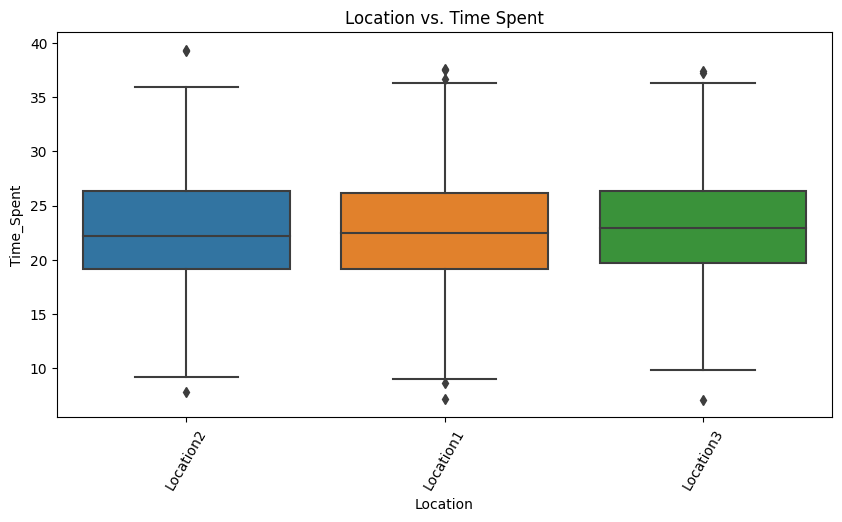

In [53]:
# Location vs. Time Spent
plt.figure(figsize=(10,5))
sns.boxplot(x='Location', y='Time_Spent', data=df)
plt.tick_params(axis='x', rotation=60)
plt.title('Location vs. Time Spent')
plt.show()

The median of time spent and CTR are both similar across three locations, as well as the range of interquartile range (IQR), indicating that the differences on both time spent and CTR in each location are small.

In [ ]:
variant = df['Variant'].unique().tolist()

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(8,15))

for i in range(len(variant)):
  data = df[df['Variant'] == (variant[i])]
  plot = sns.boxplot(ax = ax[i],
            x = "Location",
            y = "CTR",
            data = data)
  ax[i].tick_params(axis='x', rotation=60)
  ax[i].set_title(variant[i])
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(8,15))

for i in range(len(variant)):
  data = df[df['Variant'] == (variant[i])]
  plot = sns.boxplot(ax = ax[i],
            x = "Location",
            y = "Time_Spent",
            data = data)
  ax[i].tick_params(axis='x', rotation=60)
  ax[i].set_title(variant[i])
fig.tight_layout()

* Device

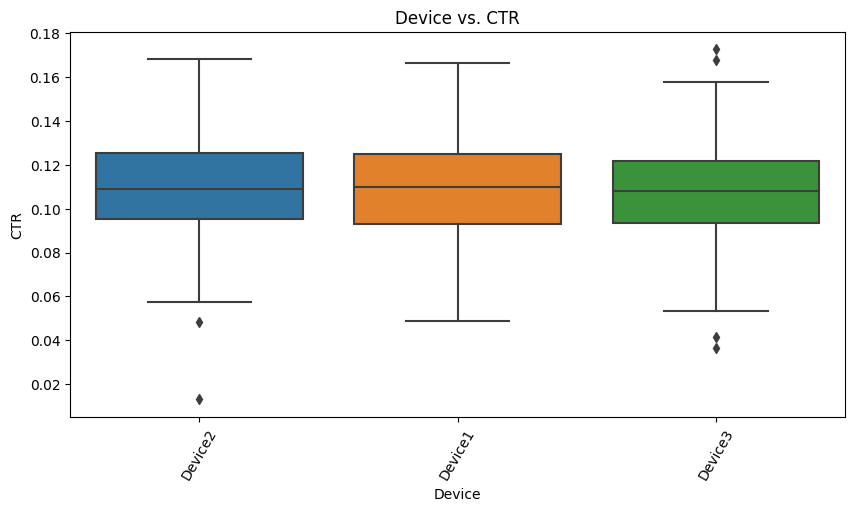

In [54]:
# Device vs. CTR
plt.figure(figsize=(10,5))
sns.boxplot(x='Device', y='CTR', data=df)
plt.tick_params(axis='x', rotation=60)
plt.title('Device vs. CTR')
plt.show()

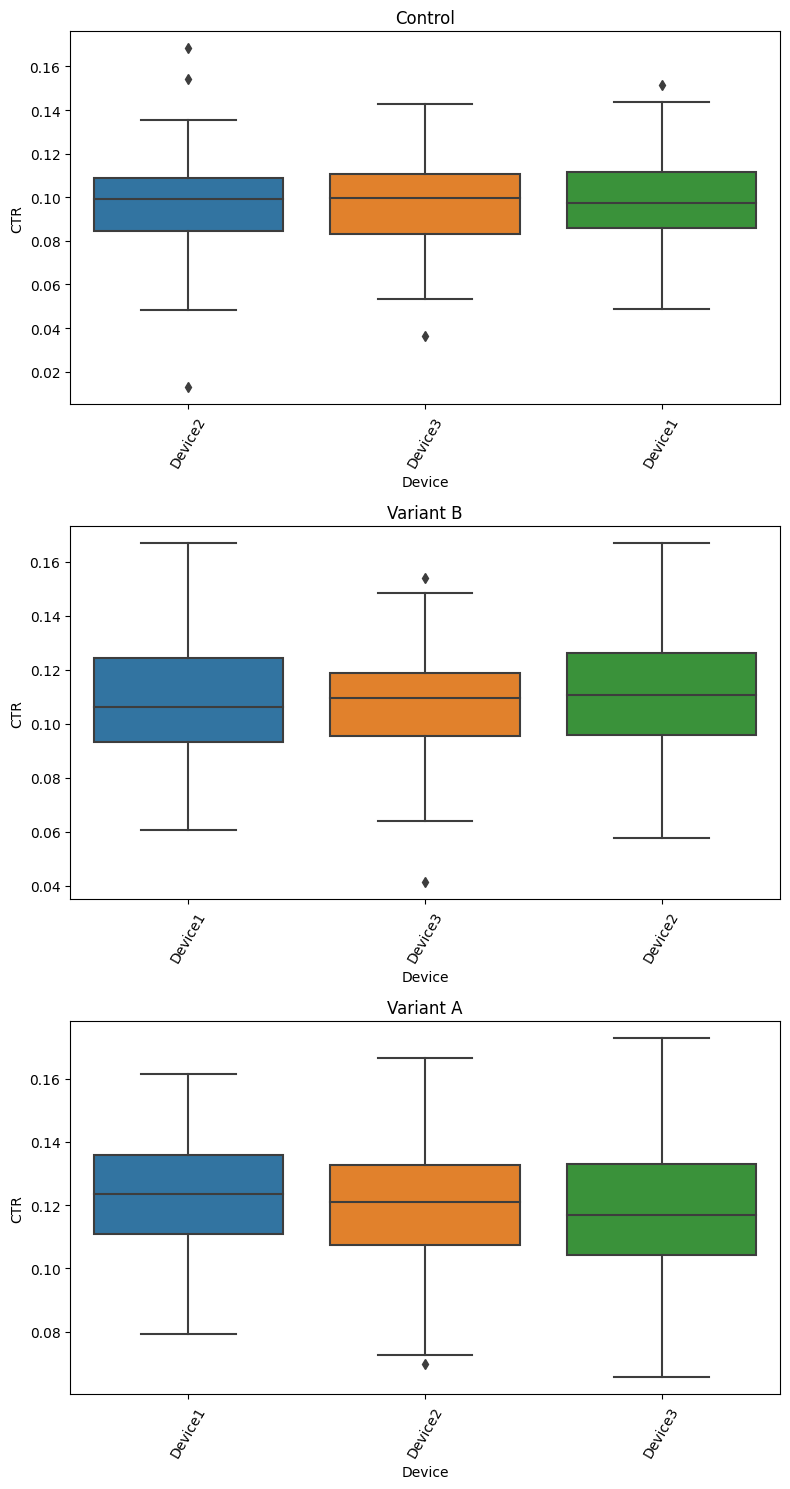

In [115]:
fig, ax = plt.subplots(3,1, figsize=(8,15))

for i in range(len(variant)):
  data = df[df['Variant'] == (variant[i])]
  plot = sns.boxplot(ax = ax[i],
            x = "Device",
            y = "CTR",
            data = data)
  ax[i].tick_params(axis='x', rotation=60)
  ax[i].set_title(variant[i])
fig.tight_layout()

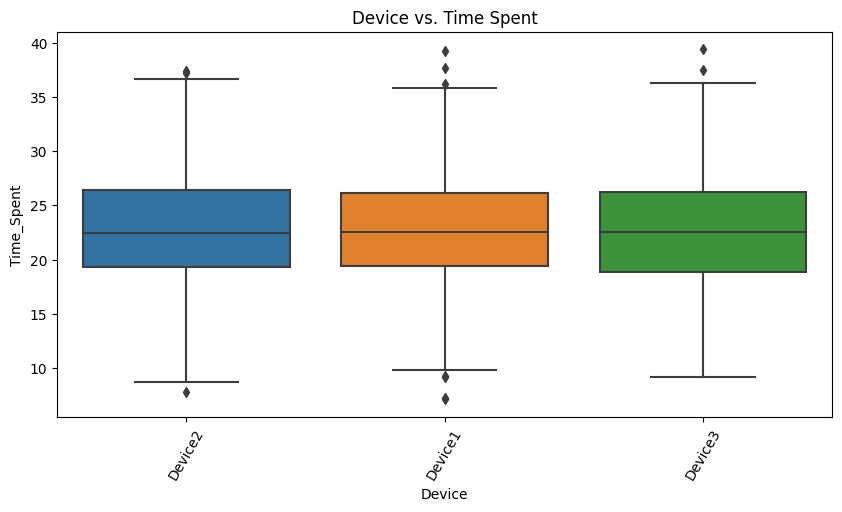

In [55]:
# Device vs. Time Spent
plt.figure(figsize=(10,5))
sns.boxplot(x='Device', y='Time_Spent', data=df)
plt.tick_params(axis='x', rotation=60)
plt.title('Device vs. Time Spent')
plt.show()

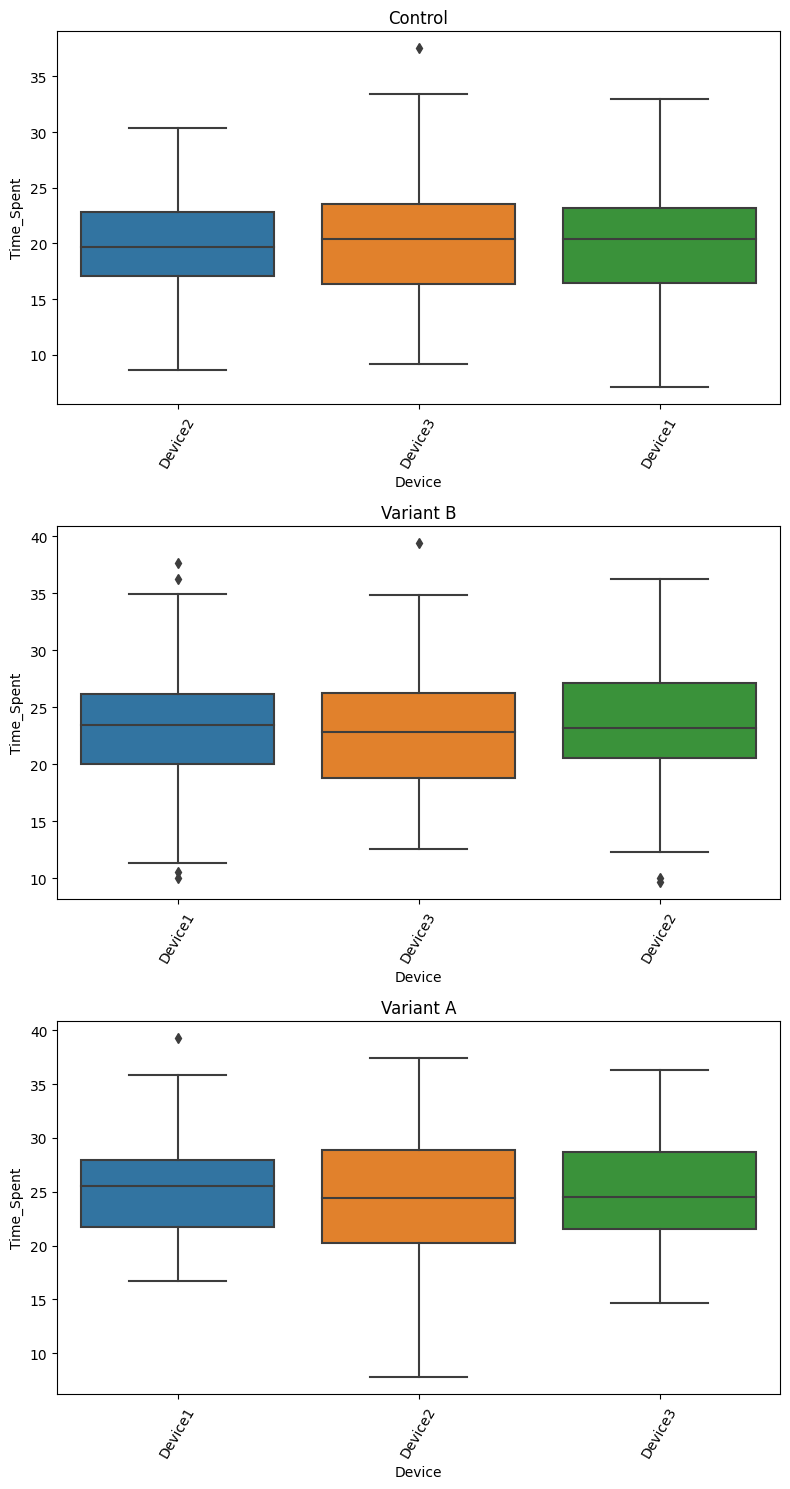

In [116]:
fig, ax = plt.subplots(3,1, figsize=(8,15))

for i in range(len(variant)):
  data = df[df['Variant'] == (variant[i])]
  plot = sns.boxplot(ax = ax[i],
            x = "Device",
            y = "Time_Spent",
            data = data)
  ax[i].tick_params(axis='x', rotation=60)
  ax[i].set_title(variant[i])
fig.tight_layout()

Again, the median of time spent and CTR are both similar for three devices, as well as the range of IQR, indicating that the differences on both time spent and CTR in each device are small.

## 2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.


### control vs feature

In [56]:
# splite into control group and feature group
control = df[df['Variant'] == "Control"]
feature = df[df['Variant'] != "Control"]

* CTR

$H_0: μ_{control} = μ_{features} $  
$H_A: μ_{control} \neq μ_{features}$

where
*   $μ_{control}$ is the mean CTR for control group
*   $μ_{features}$ is the mean CTR for features group




In [57]:
t_stat, p_val = stats.ttest_ind(control['CTR'], feature['CTR'])
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -11.423242564842523
P-value: 1.7264542366922571e-28


Since the P-value is less than significant level of 0.05, we have strong evidence to reject the null hypothesis that the mean CTR for control group and fetures group are the same.

* Time Spent

$H_0: μ_{control} = μ_{features} $  
$H_A: μ_{control} \neq μ_{features}$

where
*   $μ_{control}$ is the mean time spent for control group
*   $μ_{features}$ is the mean time spent for features group




In [58]:
t_stat, p_val = stats.ttest_ind(control['Time_Spent'], feature['Time_Spent'])
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -11.662599642106118
P-value: 1.481747476431182e-29


Similarly, since the P-value is less than significant level of 0.05, we have strong evidence to reject the null hypothesis that the mean time spent for control group and fetures group are the same.

### control vs variant A vs variant B

In [59]:
# split into control, Variant A and Variant B groups
control = df[df['Variant'] == "Control"]
VA = df[df['Variant'] == "Variant A"]
VB = df[df['Variant'] == "Variant B"]

* CTR

$H_0: μ_{control} = μ_{VA} = μ_{VB} $  
$H_A: \text{at least one group has mean of CTR different from others}$

where
*   $μ_{control}$ is the mean CTR for control group
*   $μ_{VA}$ is the mean CTR for Variant A
*   $μ_{VB}$ is the mean CTR for Variant B




In [60]:
f_stat, p_val = stats.f_oneway(control['CTR'], VA['CTR'], VB['CTR'])
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 93.588915936227
P-value: 5.638952705781955e-38


Since the P-value is less than significant level of 0.05, we have strong evidence to reject the null hypothesis that the mean CTR for three groups are the same.

* Time Spent

$H_0: μ_{control} = μ_{VA} = μ_{VB} $  
$H_A: \text{at least one group has mean of time spent different from others}$

where
*   $μ_{control}$ is the mean CTR for control group
*   $μ_{VA}$ is the mean CTR for Variant A
*   $μ_{VB}$ is the mean CTR for Variant B




In [61]:
f_stat, p_val = stats.f_oneway(control['Time_Spent'], VA['Time_Spent'], VB['Time_Spent'])
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 75.60840947416146
P-value: 2.676826588910432e-31


Since the P-value is less than significant level of 0.05, we have strong evidence to reject the null hypothesis that the mean Time Spent for three groups are the same.



## 3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 



Notice that Variant has the greatest impacts on either CTR or Time Spent, compared to other variables such as age and location. In particular, the feature of Variant A shows the best performance on CTR and Time Spent lift, followed by Variant B. This indicats that the the feature of Variant A should be deployed instead of chosing Variant B or stay with control group option.

In [119]:
CTR_con = ols('CTR ~ Age*Location*Device', data = control).fit()
print(CTR_con.params)

Intercept                                      0.085684
Location[T.Location2]                          0.004363
Location[T.Location3]                          0.003623
Device[T.Device2]                              0.010004
Device[T.Device3]                              0.010162
Location[T.Location2]:Device[T.Device2]        0.006072
Location[T.Location3]:Device[T.Device2]       -0.016435
Location[T.Location2]:Device[T.Device3]       -0.002907
Location[T.Location3]:Device[T.Device3]       -0.003706
Age                                            0.000417
Age:Location[T.Location2]                     -0.000163
Age:Location[T.Location3]                     -0.000250
Age:Device[T.Device2]                         -0.000290
Age:Device[T.Device3]                         -0.000432
Age:Location[T.Location2]:Device[T.Device2]   -0.000236
Age:Location[T.Location3]:Device[T.Device2]    0.000477
Age:Location[T.Location2]:Device[T.Device3]    0.000226
Age:Location[T.Location3]:Device[T.Device3]    0

In [120]:
Time_con = ols('Time_Spent ~ Age*Location*Device', data = control).fit()
print(Time_con.params)

Intercept                                      18.826494
Location[T.Location2]                          -1.879338
Location[T.Location3]                          -4.879995
Device[T.Device2]                               1.376078
Device[T.Device3]                              -1.202844
Location[T.Location2]:Device[T.Device2]         1.189757
Location[T.Location3]:Device[T.Device2]         6.919543
Location[T.Location2]:Device[T.Device3]         6.045573
Location[T.Location3]:Device[T.Device3]        12.296717
Age                                             0.002756
Age:Location[T.Location2]                       0.075860
Age:Location[T.Location3]                       0.151695
Age:Device[T.Device2]                          -0.030081
Age:Device[T.Device3]                           0.085129
Age:Location[T.Location2]:Device[T.Device2]    -0.019472
Age:Location[T.Location3]:Device[T.Device2]    -0.146263
Age:Location[T.Location2]:Device[T.Device3]    -0.198796
Age:Location[T.Location3]:Devic

In [121]:
CTR_VA = ols('CTR ~ Age*Location*Device', data = VA).fit()
print(CTR_VA.params)

Intercept                                      0.125162
Location[T.Location2]                         -0.018830
Location[T.Location3]                          0.003545
Device[T.Device2]                              0.005637
Device[T.Device3]                             -0.001771
Location[T.Location2]:Device[T.Device2]        0.037243
Location[T.Location3]:Device[T.Device2]       -0.021495
Location[T.Location2]:Device[T.Device3]        0.020568
Location[T.Location3]:Device[T.Device3]       -0.014665
Age                                           -0.000056
Age:Location[T.Location2]                      0.000539
Age:Location[T.Location3]                     -0.000161
Age:Device[T.Device2]                         -0.000171
Age:Device[T.Device3]                          0.000054
Age:Location[T.Location2]:Device[T.Device2]   -0.001027
Age:Location[T.Location3]:Device[T.Device2]    0.000595
Age:Location[T.Location2]:Device[T.Device3]   -0.000756
Age:Location[T.Location3]:Device[T.Device3]    0

In [122]:
Time_VA = ols('Time_Spent ~ Age*Location*Device', data = VA).fit()
print(Time_VA.params)

Intercept                                      24.643205
Location[T.Location2]                          -0.093966
Location[T.Location3]                           0.274078
Device[T.Device2]                               2.330084
Device[T.Device3]                              -1.060481
Location[T.Location2]:Device[T.Device2]         0.892587
Location[T.Location3]:Device[T.Device2]        -6.693551
Location[T.Location2]:Device[T.Device3]         3.655808
Location[T.Location3]:Device[T.Device3]         0.587095
Age                                             0.004022
Age:Location[T.Location2]                       0.006828
Age:Location[T.Location3]                       0.018533
Age:Device[T.Device2]                          -0.047285
Age:Device[T.Device3]                           0.013946
Age:Location[T.Location2]:Device[T.Device2]    -0.060996
Age:Location[T.Location3]:Device[T.Device2]     0.130253
Age:Location[T.Location2]:Device[T.Device3]    -0.073603
Age:Location[T.Location3]:Devic

In [123]:
CTR_VB = ols('CTR ~ Age*Location*Device', data = VB).fit()
print(CTR_VB.params)

Intercept                                      0.108780
Location[T.Location2]                         -0.005819
Location[T.Location3]                         -0.004180
Device[T.Device2]                              0.005419
Device[T.Device3]                              0.002131
Location[T.Location2]:Device[T.Device2]       -0.011138
Location[T.Location3]:Device[T.Device2]        0.010440
Location[T.Location2]:Device[T.Device3]       -0.005442
Location[T.Location3]:Device[T.Device3]        0.004002
Age                                            0.000052
Age:Location[T.Location2]                      0.000037
Age:Location[T.Location3]                     -0.000017
Age:Device[T.Device2]                         -0.000147
Age:Device[T.Device3]                         -0.000145
Age:Location[T.Location2]:Device[T.Device2]    0.000265
Age:Location[T.Location3]:Device[T.Device2]   -0.000049
Age:Location[T.Location2]:Device[T.Device3]    0.000247
Age:Location[T.Location3]:Device[T.Device3]    0

In [124]:
Time_VB = ols('Time_Spent ~ Age*Location*Device', data = VB).fit()
print(Time_VB.params)

Intercept                                      26.557366
Location[T.Location2]                          -4.521013
Location[T.Location3]                           0.105360
Device[T.Device2]                              -2.543597
Device[T.Device3]                              -2.325742
Location[T.Location2]:Device[T.Device2]         1.632131
Location[T.Location3]:Device[T.Device2]        -0.325491
Location[T.Location2]:Device[T.Device3]         0.132213
Location[T.Location3]:Device[T.Device3]        -0.459106
Age                                            -0.053398
Age:Location[T.Location2]                       0.100928
Age:Location[T.Location3]                      -0.074632
Age:Device[T.Device2]                           0.055157
Age:Device[T.Device3]                           0.023466
Age:Location[T.Location2]:Device[T.Device2]    -0.038538
Age:Location[T.Location3]:Device[T.Device2]     0.064251
Age:Location[T.Location2]:Device[T.Device3]    -0.028257
Age:Location[T.Location3]:Devic


## 4. Create a roll-out plan. How quickly will you introduce the feature to your audience?